## CNN MNIST

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


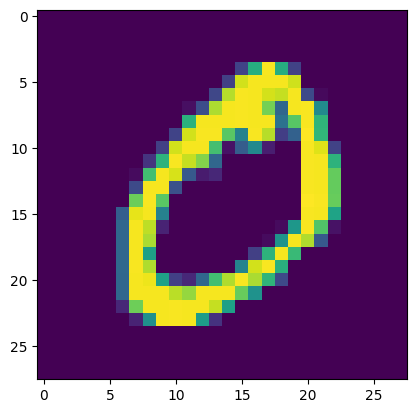

In [6]:
plt.imshow(x_train[1])

In [7]:
print(x_train[1].shape)
print("x_train:",x_train.shape)
print("y_train:", y_train.shape)
print("x_test", x_test.shape)

(28, 28)
x_train: (60000, 28, 28)
y_train: (60000,)
x_test (10000, 28, 28)


In [8]:
x_train = np.reshape(x_train, (-1,28,28,1))
x_test = np.reshape(x_test, (-1,28,28,1))
print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [9]:
x_train = x_train/255
x_test = x_test/255

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
y_train.shape

(60000,)

In [12]:
print(np.zeros((10,4)))

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [13]:
def one_hot_encode(y, class_num):
    ohs = np.zeros((y.shape[0], class_num))
    for i, val in enumerate(y):
        ohs[i][val] +=1
    return ohs

print(one_hot_encode(y_train, 10))
print(y_train[-1], one_hot_encode(y_train,10)[-1])


y_train = one_hot_encode(y_train,10)
y_test = one_hot_encode(y_test, 10)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
8 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [14]:
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size = 3, activation="relu", input_shape=(28,28,1)),
    keras.layers.MaxPool2D(pool_size=2, strides=1),
    keras.layers.Conv2D(64, kernel_size = 3, activation="relu"),
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [15]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print(tf.config.list_physical_devices('GPU'))


Num GPUs Available: 1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [16]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
model.fit(x_train,y_train,batch_size=100,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
600/600 [==============================] - 14s 13ms/step - loss: 0.1116 - accuracy: 0.9669 - val_loss: 0.0379 - val_accuracy: 0.9866
Epoch 2/5
600/600 [==============================] - 7s 12ms/step - loss: 0.0314 - accuracy: 0.9901 - val_loss: 0.0496 - val_accuracy: 0.9847
Epoch 3/5
600/600 [==============================] - 7s 12ms/step - loss: 0.0191 - accuracy: 0.9938 - val_loss: 0.0473 - val_accuracy: 0.9844
Epoch 4/5
600/600 [==============================] - 7s 12ms/step - loss: 0.0118 - accuracy: 0.9961 - val_loss: 0.0367 - val_accuracy: 0.9894
Epoch 5/5
600/600 [==============================] - 7s 12ms/step - loss: 0.0101 - accuracy: 0.9967 - val_loss: 0.0396 - val_accuracy: 0.9883


In [17]:
print("Training:", model.evaluate(x_train, y_train))
print("Test:", model.evaluate(x_test, y_test))

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0075 - accuracy: 0.9977
Training: [0.007493865676224232, 0.9976666569709778]
313/313 [==============================] - 1s 3ms/step - loss: 0.0396 - accuracy: 0.9883
Test: [0.03961974009871483, 0.9883000254631042]


In [ ]:
model_2 = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size= 3, strides = 1, activation="relu", input_shape = (28,28,1)),
    keras.layers.MaxPool2D(pool_size= 2, strides = 1),
    keras.layers.Conv2D(64, kernel_size = 3, strides = 2, activation = "relu"),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation = "relu"), 
    keras.layers.Dense(1024, activation="relu"),
    keras.layers.Dense(10, activation = "softmax")
])

In [23]:
model_2.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
model_2.fit(x_train,y_train, batch_size = 100, epochs = 5, validation_data = (x_test,y_test))

Epoch 1/5
600/600 [==============================] - 3s 5ms/step - loss: 0.0159 - accuracy: 0.9948 - val_loss: 0.0698 - val_accuracy: 0.9826
Epoch 2/5
600/600 [==============================] - 2s 4ms/step - loss: 0.0135 - accuracy: 0.9957 - val_loss: 0.0549 - val_accuracy: 0.9866
Epoch 3/5
600/600 [==============================] - 2s 4ms/step - loss: 0.0078 - accuracy: 0.9974 - val_loss: 0.0609 - val_accuracy: 0.9865
Epoch 4/5
600/600 [==============================] - 2s 3ms/step - loss: 0.0085 - accuracy: 0.9971 - val_loss: 0.0694 - val_accuracy: 0.9864
Epoch 5/5
600/600 [==============================] - 2s 3ms/step - loss: 0.0093 - accuracy: 0.9969 - val_loss: 0.0607 - val_accuracy: 0.9865


In [24]:
print("Training:", model_2.evaluate(x_train, y_train))
print("Test:", model_2.evaluate(x_test, y_test))

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0059 - accuracy: 0.9980
Training: [0.005850671790540218, 0.998033344745636]
313/313 [==============================] - 1s 3ms/step - loss: 0.0607 - accuracy: 0.9865
Test: [0.060722772032022476, 0.9865000247955322]


In [25]:
model_3 = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size = 3, strides = 1, activation = 'relu', input_shape = (28,28,1)),
    keras.layers.Conv2D(64, kernel_size= 3, strides = 1, activation = "relu"),
    keras.layers.MaxPool2D(pool_size=2, strides = 1 ),
    keras.layers.Flatten(),
    
    keras.layers.Dense(128, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
    
])

In [29]:
model_3.compile(optimizer = "rmsprop", loss = "categorical_crossentropy", metrics = ["accuracy"])
model_3.fit(x_train,y_train, batch_size = 100, epochs = 5, validation_data = (x_test,y_test))

Epoch 1/5
600/600 [==============================] - 6s 9ms/step - loss: 0.0065 - accuracy: 0.9979 - val_loss: 0.0404 - val_accuracy: 0.9919
Epoch 2/5
600/600 [==============================] - 5s 9ms/step - loss: 0.0036 - accuracy: 0.9989 - val_loss: 0.0460 - val_accuracy: 0.9910
Epoch 3/5
600/600 [==============================] - 5s 9ms/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.0560 - val_accuracy: 0.9897
Epoch 4/5
600/600 [==============================] - 5s 9ms/step - loss: 0.0013 - accuracy: 0.9995 - val_loss: 0.0566 - val_accuracy: 0.9913
Epoch 5/5
600/600 [==============================] - 5s 9ms/step - loss: 0.0012 - accuracy: 0.9995 - val_loss: 0.0633 - val_accuracy: 0.9906


In [30]:
print("Training:", model_3.evaluate(x_train, y_train))
print("Test:", model_3.evaluate(x_test, y_test))

1875/1875 [==============================] - 6s 3ms/step - loss: 4.0611e-04 - accuracy: 0.9999
Training: [0.0004061130457557738, 0.9998666644096375]
313/313 [==============================] - 1s 3ms/step - loss: 0.0633 - accuracy: 0.9906
Test: [0.06332983076572418, 0.9905999898910522]


### Model 3 is the best